In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Set the path to your dataset
train_data_dir = 'C:/Users/DELL 7480/Downloads/cats and dogs dataset/train'
validation_data_dir = 'C:/Users/DELL 7480/Downloads/cats and dogs dataset/test'

In [9]:
# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

In [10]:
# Use MobileNetV2 as the base model (pre-trained on ImageNet)
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_width, img_height, 3),include_top=False,weights='imagenet')

9406464/9406464 [==============================] - 48s 5us/step


1. The code uses transfer learning with the MobileNetV2 architecture pre-trained on ImageNet as the base model.
2. A Global Average Pooling layer is added to reduce the spatial dimensions, and a Dense layer with a sigmoid activation function is added for binary classification (cat or dog).
3. The model is compiled with the Adam optimizer, binary cross-entropy loss, and accuracy as the metric.
4. CNNs are a natural choice for image classification tasks, and transfer learning with a pre-trained model like MobileNetV2 enhances performance, especially when dealing with limited datasets.

In [11]:
# Freeze the convolutional base
base_model.trainable = False

In [17]:
from tensorflow.keras import models,layers 
# Create a new model on top of the base model
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
# Data augmentation to prevent overfitting
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [20]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=10,
                    validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size)


Epoch 1/10
17/17 [==============================] - 41s 2s/step - loss: 0.5851 - accuracy: 0.6933 - val_loss: 0.5881 - val_accuracy: 0.7188
Epoch 2/10
17/17 [==============================] - 33s 2s/step - loss: 0.5212 - accuracy: 0.7886 - val_loss: 0.5498 - val_accuracy: 0.7500
Epoch 3/10
17/17 [==============================] - 33s 2s/step - loss: 0.4865 - accuracy: 0.8038 - val_loss: 0.4885 - val_accuracy: 0.8125
Epoch 4/10
17/17 [==============================] - 33s 2s/step - loss: 0.4303 - accuracy: 0.8552 - val_loss: 0.4551 - val_accuracy: 0.8516
Epoch 5/10
17/17 [==============================] - 35s 2s/step - loss: 0.4042 - accuracy: 0.8648 - val_loss: 0.4281 - val_accuracy: 0.8438
Epoch 6/10
17/17 [==============================] - 34s 2s/step - loss: 0.3798 - accuracy: 0.8895 - val_loss: 0.4113 - val_accuracy: 0.8516
Epoch 7/10
17/17 [==============================] - 33s 2s/step - loss: 0.3515 - accuracy: 0.8914 - val_loss: 0.3894 - val_accuracy: 0.8516
Epoch 8/10
17/17 [==

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

4/4 [==============================] - 5s 1s/step - loss: 0.3371 - accuracy: 0.8828
Test Accuracy: 88.28%


In [22]:
# Visualize training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

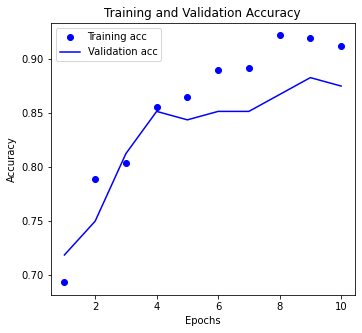

In [25]:
import matplotlib.pyplot as plt 
# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

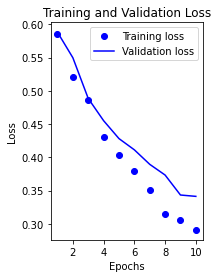

In [29]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# Save the model
model.save('cat_dog_classifier_transfer_learning.h5')

C:\Users\DELL 7480\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
